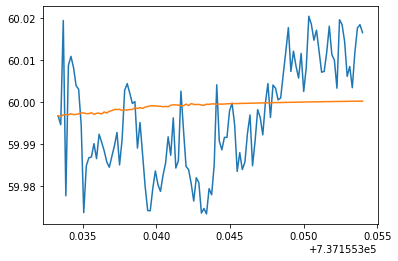

0.013170360823400762


In [14]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
import pandas as pd
from statsmodels.tsa.ar_model import AR
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#Enf values and time were extracted from the region-specific matlab data
data = sio.loadmat('sample_west.mat') 
t_data = data['t_data'] # t_data means all the time in the enf data before the predicted time
y_data = data['y_data'] # y_data means all enf values except those predicted.
t_ans = data['t_ans'] # t_ans means the time after which you want to predict.
y_ans = data['y_ans'] # y_ans means the actual enf value from the time you predict

t_cur = 4*60*8 # AM 8:00 ~ AM 8:30 prediction
pred_n = 4*30 # The number of data values that occur at the time we predict
    
cur_data = y_ans[:t_cur] # Of all the enf values after the point of prediction, the enf value for the time being predicted

"""
Root Mean Square Error (RMSE) are commonly used to deal with the difference between estimated values or values predicted by the model and those observed in the actual environment. 
Suitable for expressing precision. Each difference is also referred to as residuals, the mean square root deviation is used to aggregate the residuals into one measure.
"""
#Define the rmse function
def rmse(y_pred, y_ans):
    return np.sqrt(np.mean((y_pred-y_ans)**2)) #In the estimate of convenience, the mean square root error is the square root of the variance

#Define the Predict function
def predict(y_train, y, n):
    data = np.vstack([y_train ,y]) #Combined the data required for the train
    model_fit = AR(data).fit() #Fitted data using AR model
    window = model_fit.k_ar #Found a window suitable for the learned data
    ar_coef = model_fit.params #Found a parameter suitable for the learned data
    
    """Using the predict function provided by the AR model, it estimated the desired forecast with fitted data.
    The starting point of the prediction is the length from the length after the data you have learned to the length from pred_n."""
    
    yhat = model_fit.predict(start = len(data) , end = len(data)+n-1, dynamic=False)
    yhat[t_cur:t_cur+n] # Split the predicted data values as long as you predict
    
    return yhat

#Apply the data previously imported to the defined predict function    
y_pred = predict(y_data,cur_data,pred_n)

#Comparison of predicted and actual values
plt.plot(t_ans[t_cur:t_cur+pred_n], y_ans[t_cur:t_cur+pred_n]) #Extracting the actual ENF value that occurred at the predicted time
plt.plot(t_ans[t_cur:t_cur+pred_n], y_pred[:]) #Extracting the predicted ENF values that occur at the predicted time
plt.show() #expressed in plot
    
print(rmse(y_ans[t_cur:t_cur+pred_n],y_pred[:])) #Outputs the error between the actual and predicted values using the defined rmse function

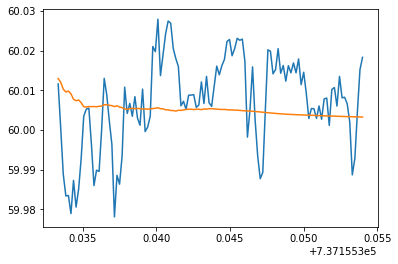

0.0115568416443129


In [15]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import os
from pandas import read_csv
import pandas as pd
from statsmodels.tsa.ar_model import AR
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

data = sio.loadmat('sample_east.mat')
t_data = data['t_data']
y_data = data['y_data']
t_ans = data['t_ans']
y_ans = data['y_ans']
t_cur = 4*60*8 # AM 9:00 ~ AM 9:30 prediction
pred_n = 4*30
    
cur_data = y_ans[:t_cur]

def rmse(y_pred, y_ans):
    return np.sqrt(np.mean((y_pred-y_ans)**2))

def predict(y_train, y, n):
    data = np.vstack([y_train ,y])
    model_fit = AR(data).fit()
    window = model_fit.k_ar
    ar_coef = model_fit.params
    
    yhat = model_fit.predict(start = len(data) , end = len(data)+n-1, dynamic=False)
    yhat[t_cur:t_cur+n]
    
    return yhat

y_pred = predict(y_data,cur_data,pred_n)
    
plt.plot(t_ans[t_cur:t_cur+pred_n], y_ans[t_cur:t_cur+pred_n])
plt.plot(t_ans[t_cur:t_cur+pred_n], y_pred[:])
plt.show()
    
print(rmse(y_ans[t_cur:t_cur+pred_n],y_pred[:]))

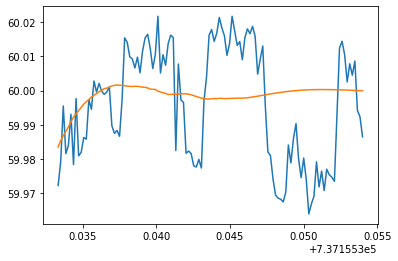

0.016963413477690207


In [16]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import os
from pandas import read_csv
import pandas as pd
from statsmodels.tsa.ar_model import AR
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

data = sio.loadmat('sample_texas.mat')
t_data = data['t_data']
y_data = data['y_data']
t_ans = data['t_ans']
y_ans = data['y_ans']
t_cur = 4*60*8 # AM 9:00 ~ AM 9:30 prediction
pred_n = 4*30
    
cur_data = y_ans[:t_cur]

def rmse(y_pred, y_ans):
    return np.sqrt(np.mean((y_pred-y_ans)**2))

def predict(y_train, y, n):
    data = np.vstack([y_train ,y])
    model_fit = AR(data).fit()
    window = model_fit.k_ar
    ar_coef = model_fit.params
    
    yhat = model_fit.predict(start = len(data) , end = len(data)+n-1, dynamic=False)
    yhat[t_cur:t_cur+n]
    
    return yhat

y_pred = predict(y_data,cur_data,pred_n)
    
plt.plot(t_ans[t_cur:t_cur+pred_n], y_ans[t_cur:t_cur+pred_n])
plt.plot(t_ans[t_cur:t_cur+pred_n], y_pred[:])
plt.show()
    
print(rmse(y_ans[t_cur:t_cur+pred_n],y_pred[:]))